In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
X=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

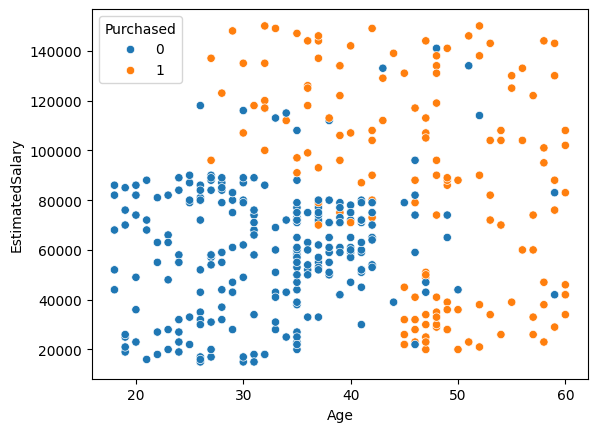

In [14]:
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],hue=df['Purchased'])

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape,y_train.shape)

(320, 2) (320,)


In [18]:
model=Sequential()
model.add(Dense(2,input_dim=2,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test))

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6973 - loss: 0.6928 - val_accuracy: 0.6000 - val_loss: 0.6923
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6785 - loss: 0.6913 - val_accuracy: 0.6000 - val_loss: 0.6915
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6842 - loss: 0.6897 - val_accuracy: 0.6000 - val_loss: 0.6907
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6443 - loss: 0.6893 - val_accuracy: 0.6000 - val_loss: 0.6899
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6781 - loss: 0.6870 - val_accuracy: 0.6000 - val_loss: 0.6891
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6143 - loss: 0.6883 - val_accuracy: 0.6000 - val_loss: 0.6885
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6481 - loss: 0.6858 - val_accuracy: 0.6000 - val_loss: 0.6877
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6426 - loss: 0.6850 - val_accuracy: 0.6000 - 

Training with Scaled Feature

In [20]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

<Axes: >

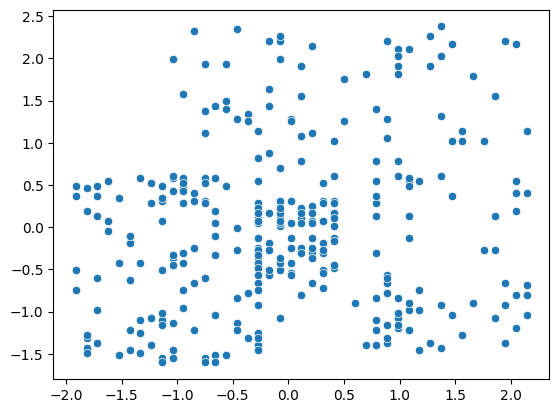

In [29]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history_scaled=model.fit(X_train_scaled,y_train,epochs=200,validation_data=(X_test_scaled,y_test))

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.8128 - loss: 0.5516 - val_accuracy: 0.8625 - val_loss: 0.5373
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8278 - loss: 0.5355 - val_accuracy: 0.8625 - val_loss: 0.5319
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8108 - loss: 0.5417 - val_accuracy: 0.8500 - val_loss: 0.5271
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8131 - loss: 0.5480 - val_accuracy: 0.8500 - val_loss: 0.5234
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8097 - loss: 0.5414 - val_accuracy: 0.8500 - val_loss: 0.5189
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8172 - loss: 0.5444 - val_accuracy: 0.8500 - val_loss: 0.5152
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8347 - loss: 0.5220 - val_accuracy: 0.8500 - val_loss: 0.5109
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8149 - loss: 0.5308 - val_accuracy: 0.8500 - 

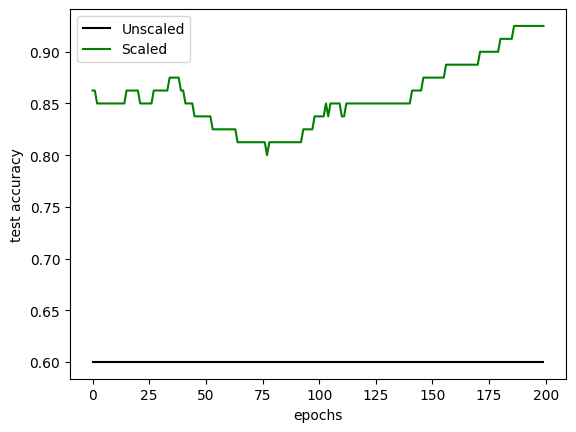

In [33]:
plt.plot(history.history['val_accuracy'],color='black',label='Unscaled')
plt.plot(history_scaled.history['val_accuracy'],color='green',label='Scaled')
plt.xlabel('epochs')
plt.ylabel('test accuracy')
plt.legend()
plt.show()